**Exercise 2: Logistic Regression**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as optimize
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns
import warnings

Read the data, plot it to visualize

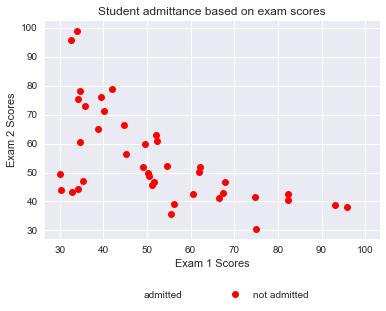

In [2]:
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set_style("darkgrid")

f = open('ex2data1.txt')
lines =  np.array([map(float, x.strip().split(',')) for x in f.read().strip().split('\n')])
b0 = lines[:,2] == 0
b1 = lines[:,2] == 1

# Separate into values with y = 0 (neg) & y = 1 (pos)
pos = np.delete(lines[b1], 2, axis=1)
neg = np.delete(lines[b0], 2, axis=1)

#Plot the data

def draw_raw_data():
    plt.title('Student admittance based on exam scores')
    plt.plot(pos[:, 0], pos[:, 1], 'bx', label='admitted')
    plt.plot(neg[:, 0], neg[:, 1], 'ro', label='not admitted')
    plt.xlabel('Exam 1 Scores')
    plt.ylabel('Exam 2 Scores')
    plt.legend(bbox_to_anchor=(.2, -.3, .6, -.3), loc=3,
               ncol=2, mode="expand", borderaxespad=0.)
    
draw_raw_data()
plt.show()

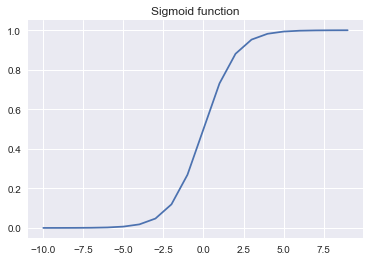

In [3]:
def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))

test = np.arange(-10, 10)
plt.title('Sigmoid function')
plt.plot(test, sigmoid(test))
plt.show()

Define Cost and gradient functions

In [4]:
def cost(thetas, x, y):
    h = sigmoid(x.dot(thetas))
    m = float(x.shape[0])
    p1 = - y.T.dot(np.log(h))
    p2 = - (1 - y).T.dot(np.log(1 - h))
    ans = (1/(m)) * (p1 + p2)
    
    try:
        ans = ans[0][0]
    except:
        ans = ans[0]
    
    if np.isnan(ans):
        return np.inf
    else:
        return ans

def grad(thetas, x, y):
    h = sigmoid(x.dot(thetas)).reshape(x.shape[0], 1)
    m = float(x.shape[0])
    ans = (1/m) * (h - y).T.dot(x)
    return ans.flatten()

Get initial cost and gradient, then minimize theta values

In [5]:
x = np.delete(lines, 2, axis=1)
y = np.delete(lines, [0, 1], axis=1)
m, n = x.shape

X = np.append(np.ones((m, 1)), x, 1)
thetas = np.zeros((n+1, 1))

# Get the initial cost
print 'Initial Cost is ', (cost(thetas, X, y))
print 'Gradient is', grad(thetas, X, y)

# Thetas minimized
get_min = optimize.minimize(cost, thetas, options={"maxiter":1500}, jac=grad, args=(X, y), method=None)
thetasopt = get_min.x

print 'Optimal thetas', thetasopt

Initial Cost is  0.69314718056
Gradient is [ -0.1        -12.00921659 -11.26284221]
Optimal thetas [-25.16131634   0.2062316    0.20147143]


Plot the decision boundary

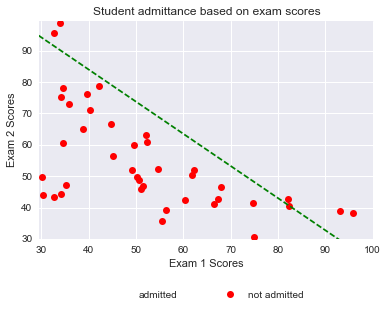

In [6]:
def draw_boundary():
    draw_raw_data()
    x_min, x_max = x[:, 0].min() - .5, x[:, 0].max() + .5
    y_min, y_max = x[:, 1].min() - .5, x[:, 1].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50),
                         np.linspace(y_min, y_max, 50))

    Xaxis = np.arange(0, 100)
    Y = -(thetasopt[0] + Xaxis*thetasopt[1])/(thetasopt[2])

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    plt.plot(Y, 'g--')
    
draw_boundary()
plt.show()

Prediction function - calculates sigmoid and returns percentage of confidence

In [7]:
def predict(X):
    XX = np.array(X).reshape(len(X), 1).T
    m = XX.shape[0]
    
    xx = np.append(np.ones((1, 1)), XX, 1)
    return sigmoid(xx.dot(thetasopt))[0]

Predict and plot

Predicting 0.0621611079057
Has failed


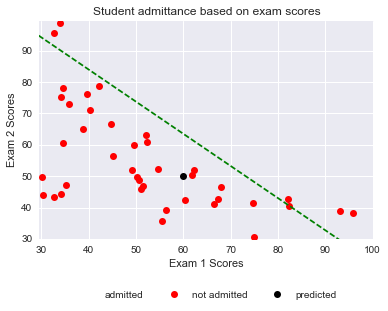

In [8]:
find_pred = [60, 50]
prediction = predict(find_pred)
print 'Predicting', prediction

if prediction > 0.5:
    print 'Has passed'
else:
    print 'Has failed'

x_min, x_max = x[:, 0].min() - .5, x[:, 0].max() + .5
y_min, y_max = x[:, 1].min() - .5, x[:, 1].max() + .5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50),
                     np.linspace(y_min, y_max, 50))

plt.title('Student admittance based on exam scores')
plt.plot(pos[:, 0], pos[:, 1], 'bx', label='admitted')
plt.plot(neg[:, 0], neg[:, 1], 'ro', label='not admitted')
plt.xlabel('Exam 1 Scores')
plt.ylabel('Exam 2 Scores')
    
Xaxis = np.arange(0, 100)
Y = -(thetasopt[0] + Xaxis*thetasopt[1])/(thetasopt[2])

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.plot(Y, 'g--')
plt.plot(find_pred[0], find_pred[1], 'ko', label='predicted')

plt.legend(bbox_to_anchor=(.1, -.3, .8, -.3), loc=3,
               ncol=3, mode="expand", borderaxespad=0.)
plt.show()

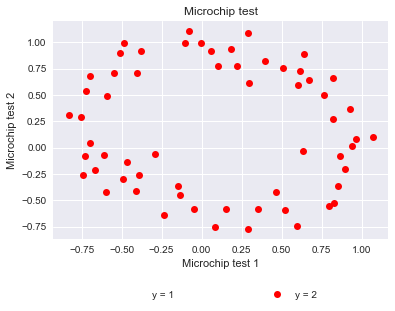

In [9]:
f = open('ex2data2.txt')

lines =  np.array([map(float, x.strip().split(',')) for x in f.read().strip().split('\n')])
b0 = lines[:,2] == 0
b1 = lines[:,2] == 1
# Separate into values with y = 0 (neg) & y = 1 (pos)
pos = np.delete(lines[b1], 2, axis=1)
neg = np.delete(lines[b0], 2, axis=1)

def draw_microchip_data():
    plt.title('Microchip test')
    plt.plot(pos[:, 0], pos[:, 1], 'bx', label='y = 1')
    plt.plot(neg[:, 0], neg[:, 1], 'ro', label='y = 2')
    plt.xlabel('Microchip test 1')
    plt.ylabel('Microchip test 2')
    plt.legend(bbox_to_anchor=(.2, -.3, .6, -.3), loc=3,
               ncol=2, mode="expand", borderaxespad=0.)
    
draw_microchip_data()
plt.show()

In [10]:
polFeatures = PolynomialFeatures(6)
higherx = polFeatures.fit_transform(lines[:, :2])

hm, hn = higherx.shape
thetas = np.zeros((hn+1, 1))
y = lines[:, 2:]
X = np.append(np.ones((hm, 1)), higherx, axis=1)
lamb = 1.0

print X.shape

(118, 29)


Cost, gradient, prediction and accuracy of regularized logisitic regression

In [11]:
def reg_cost(thetas, x, y):
    cost_wo_reg = cost(thetas, x, y)
    m, n = x.shape
    reg_term = (lamb/(2.0*float(m))) * np.sum(np.square(thetas[1:]))
    return cost_wo_reg + reg_term
    

def reg_grad(thetas, x, y):
    h = sigmoid(x.dot(thetas)).reshape(x.shape[0], 1)
    m = float(x.shape[0])
    ans = ((1/m) * (h - y).T.dot(x)) + (lamb/m * thetas.T)
    return ans.flatten()

def predict(xx, thetasopt):
    return (sigmoid(xx.dot(thetasopt)) > 0.5).astype(int)

def get_accuracy(X, thetasopt):
    predictions = predict(X, thetasopt)
    sums = sum(predictions == y.flatten())
    return sums/float(predictions.shape[0])     

Get minimzed thetas and accuracy of training

In [12]:
print 'Initial cost\n', reg_cost(thetas, X, y)
print '\nInitial thetas\n', reg_grad(thetas, X, y)

get_min = optimize.minimize(reg_cost, thetas, options={"maxiter":1500}, jac=reg_grad, args=(X, y), method=None)
thetasopt = get_min.x

print '\nOptimal thetas\n', thetasopt

Initial cost
0.69314718056

Initial thetas
[  8.47457627e-03   8.47457627e-03   1.87880932e-02   7.77711864e-05
   5.03446395e-02   1.15013308e-02   3.76648474e-02   1.83559872e-02
   7.32393391e-03   8.19244468e-03   2.34764889e-02   3.93486234e-02
   2.23923907e-03   1.28600503e-02   3.09593720e-03   3.93028171e-02
   1.99707467e-02   4.32983232e-03   3.38643902e-03   5.83822078e-03
   4.47629067e-03   3.10079849e-02   3.10312442e-02   1.09740238e-03
   6.31570797e-03   4.08503006e-04   7.26504316e-03   1.37646175e-03
   3.87936363e-02]

Optimal thetas
[ 0.60428597  0.60428597  0.61093919  1.17715671 -1.93956954 -0.90068449
 -1.35402447  0.13307165 -0.37317692 -0.36426449 -0.16603426 -1.4386814
 -0.05921337 -0.61412224 -0.27146061 -1.18617517 -0.23669508 -0.21338001
 -0.05190368 -0.27788127 -0.29795604 -0.47083302 -1.04147958  0.02025385
 -0.29421113  0.01081237 -0.32938187 -0.14351476 -0.94785343]



Accuracy of training
0.830508474576


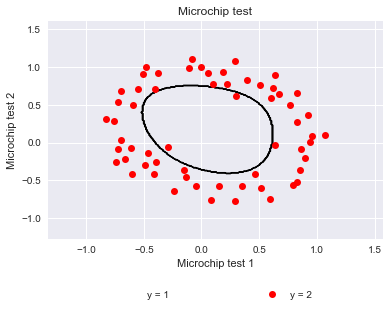

In [13]:
def draw_contour():
    x =  np.delete(lines, 2, axis=1)
    x_min, x_max = x[:, 0].min() - .5, x[:, 0].max() + .5
    y_min, y_max = x[:, 1].min() - .5, x[:, 1].max() + .5

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))

    meshpred = polFeatures.fit_transform(np.c_[xx.ravel(), yy.ravel()])
    Z = predict(meshpred, thetasopt[1:])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, alpha=1, linewidths=1, colors='k')
#     plt.contourf(xx, yy, Z); 
    draw_microchip_data()
    
print '\nAccuracy of training'
print get_accuracy(X, thetasopt)   
draw_contour()
plt.show()

Try lamda = 0, the curve is **overfitted**


Accuracy of training
0.915254237288


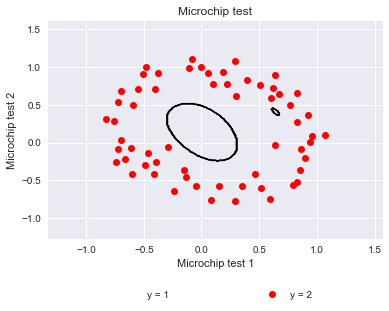

In [14]:
lamb = 0
get_min = optimize.minimize(reg_cost, thetas, options={"maxiter":1500}, jac=reg_grad, args=(X, y), method=None)
thetasopt = get_min.x

print '\nAccuracy of training'
print get_accuracy(X, thetasopt)

draw_contour()
plt.show()

Try lambda = 16, the curve is **underfitted**


Accuracy of training
0.71186440678


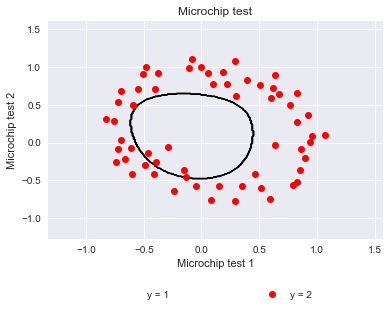

In [15]:
lamb = 16
get_min = optimize.minimize(reg_cost, thetas, options={"maxiter":1500}, jac=reg_grad, args=(X, y), method=None)
thetasopt = get_min.x

print '\nAccuracy of training'
print get_accuracy(X, thetasopt)

draw_contour()
plt.show()